In [1]:
import os
os.chdir("/Users/xinhaoliu/Desktop/Research/Code/paste")

import scanpy as sc
import matplotlib.pyplot as plt

from src.paste.fractional_align import partial_pairwise_align_given_cost_matrix
from src.paste.helper import intersect, to_dense_array, extract_data_matrix, glmpca_distance
from spatial_coherence import calculate_convex_hull_spatial_entropy

%load_ext autoreload
%autoreload 2

In [2]:
def plot_entropy_curve(m_list, source_entropy_list, target_entropy_list):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax1.plot(m_list, source_entropy_list)
    ax1.set_xlim(1, 0)
    ax1.set_xticks([0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
    ax1.set_xlabel('m')
    ax1.set_ylabel('Spatial Entropy')
    ax1.set_title('Source slice')
    
    fig, ax2 = plt.subplots(figsize=(12, 8))
    ax2.plot(m_list, target_entropy_list)
    ax2.set_xlim(1, 0)
    ax2.set_xticks([0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
    ax2.set_xlabel('m')
    ax2.set_ylabel('Spatial Entropy')
    ax2.set_title('Target slice')
    
    plt.show()

In [ ]:
***
151673_00 - 151674_10
m=0.5
***

In [3]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=8.0549E+6
Iteration: 1 | deviance=8.0545E+6
Iteration: 2 | deviance=7.0625E+6
Iteration: 3 | deviance=6.8339E+6
Iteration: 4 | deviance=6.7396E+6
Iteration: 5 | deviance=6.6964E+6
Iteration: 6 | deviance=6.6709E+6
Iteration: 7 | deviance=6.6533E+6
Iteration: 8 | deviance=6.6402E+6
Iteration: 9 | deviance=6.6302E+6
Iteration: 10 | deviance=6.6221E+6
Iteration: 11 | deviance=6.6155E+6
Iteration: 12 | deviance=6.6100E+6
Iteration: 13 | deviance=6.6053E+6
Iteration: 14 | deviance=6.6013E+6
Iteration: 15 | deviance=6.5978E+6
Iteration: 16 | deviance=6.5948E+6
Iteration: 17 | deviance=6.5922E+6
Iteration: 18 | deviance=6.5898E+6
Iteration: 19 | deviance=6.5878E+6
Iteration: 20 | deviance=6.5859E+6
Iteration: 21 | deviance=6.5842E+6
Iteration: 22 | deviance=6.5827E+6
Iteration: 23 | deviance=6.5813E+6
Iteration: 24 | deviance=6.5801E+6
Iteration: 25 | deviance=6.5789E+6
Iteration: 26 | deviance=6.5778E+6
Iteration: 27 | deviance=6.5768E+6
Iteration:

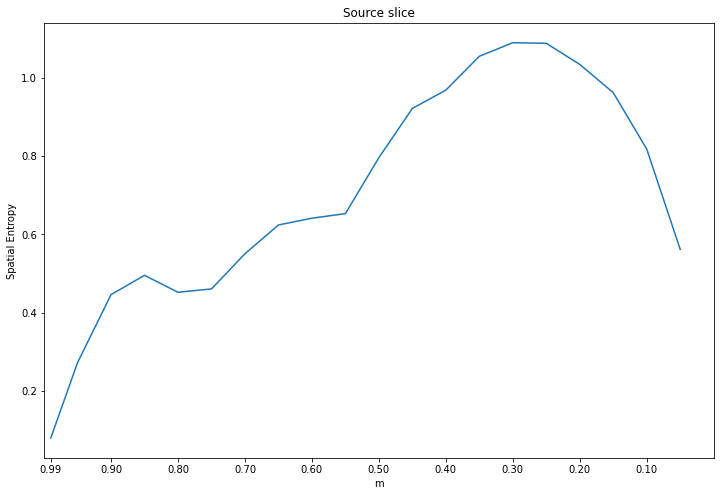

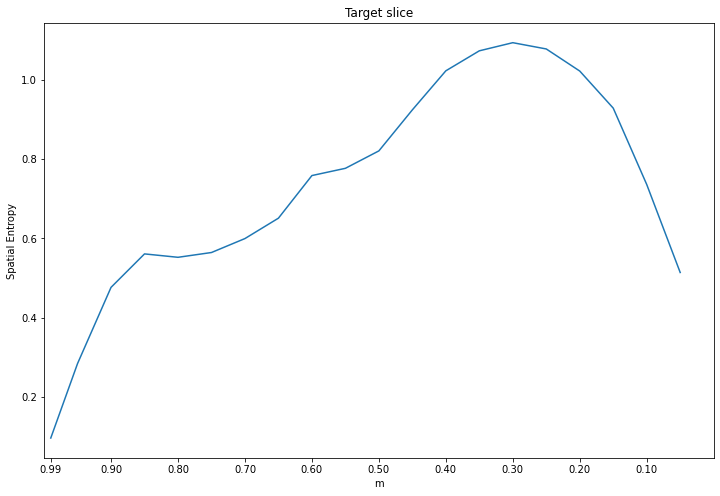

In [4]:
sliceA_convexhullentropies = []
sliceB_convexhullentropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_convexhullentropy, sliceB_convexhullentropy = calculate_convex_hull_spatial_entropy(sliceA, sliceB, pi)
    sliceA_convexhullentropies.append(sliceA_convexhullentropy)
    sliceB_convexhullentropies.append(sliceB_convexhullentropy)
    
plot_entropy_curve(m_to_run, sliceA_convexhullentropies, sliceB_convexhullentropies)

In [ ]:
***
151673_00 - 151674_10
m=0.7
***

In [5]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.7_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.7_dropFalse_rotateFalse_resampleFalse_delta0.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.1096E+7
Iteration: 1 | deviance=1.1095E+7
Iteration: 2 | deviance=9.7021E+6
Iteration: 3 | deviance=9.4101E+6
Iteration: 4 | deviance=9.2813E+6
Iteration: 5 | deviance=9.2201E+6
Iteration: 6 | deviance=9.1881E+6
Iteration: 7 | deviance=9.1679E+6
Iteration: 8 | deviance=9.1538E+6
Iteration: 9 | deviance=9.1435E+6
Iteration: 10 | deviance=9.1354E+6
Iteration: 11 | deviance=9.1291E+6
Iteration: 12 | deviance=9.1239E+6
Iteration: 13 | deviance=9.1196E+6
Iteration: 14 | deviance=9.1160E+6
Iteration: 15 | deviance=9.1129E+6
Iteration: 16 | deviance=9.1102E+6
Iteration: 17 | deviance=9.1079E+6
Iteration: 18 | deviance=9.1059E+6
Iteration: 19 | deviance=9.1041E+6
Iteration: 20 | deviance=9.1025E+6
Iteration: 21 | deviance=9.1011E+6
Iteration: 22 | deviance=9.0998E+6
Iteration: 23 | deviance=9.0986E+6
Iteration: 24 | deviance=9.0975E+6
Iteration: 25 | deviance=9.0966E+6
GLM-PCA finished with joint matrix shape (4622, 50)


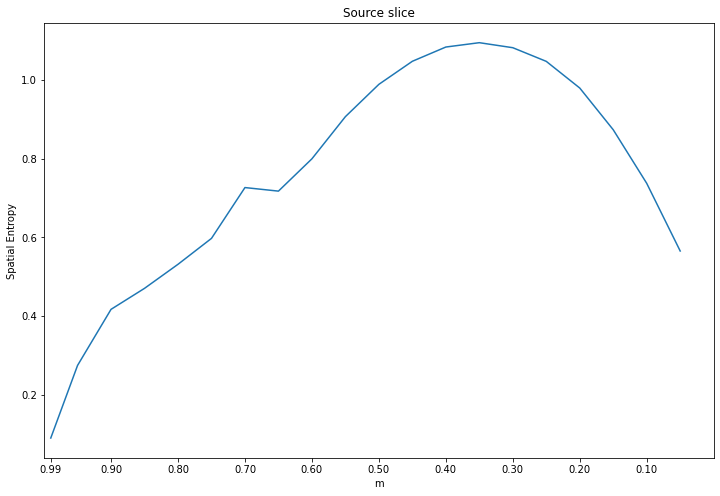

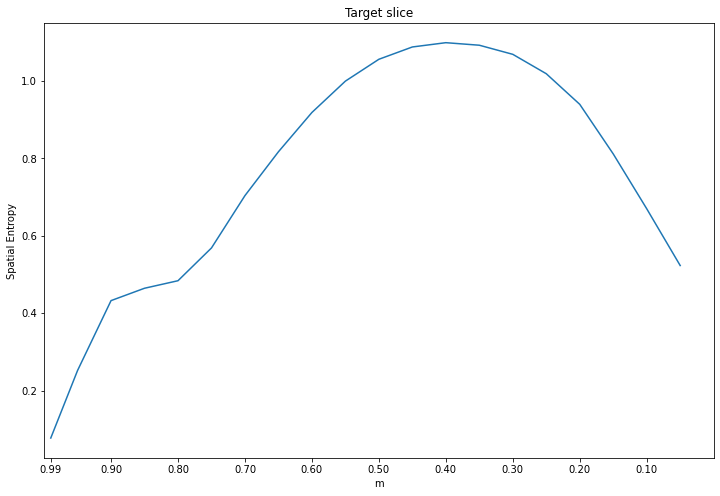

In [6]:
sliceA_convexhullentropies = []
sliceB_convexhullentropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_convexhullentropy, sliceB_convexhullentropy = calculate_convex_hull_spatial_entropy(sliceA, sliceB, pi)
    sliceA_convexhullentropies.append(sliceA_convexhullentropy)
    sliceB_convexhullentropies.append(sliceB_convexhullentropy)
    
plot_entropy_curve(m_to_run, sliceA_convexhullentropies, sliceB_convexhullentropies)

In [ ]:
***
151673_00 - 151674_10
m=0.9
***

In [7]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.9_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.9_dropFalse_rotateFalse_resampleFalse_delta0.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.5920E+7
Iteration: 1 | deviance=1.5917E+7
Iteration: 2 | deviance=1.3892E+7
Iteration: 3 | deviance=1.3496E+7
Iteration: 4 | deviance=1.3337E+7
Iteration: 5 | deviance=1.3255E+7
Iteration: 6 | deviance=1.3208E+7
Iteration: 7 | deviance=1.3178E+7
Iteration: 8 | deviance=1.3158E+7
Iteration: 9 | deviance=1.3143E+7
Iteration: 10 | deviance=1.3132E+7
Iteration: 11 | deviance=1.3123E+7
Iteration: 12 | deviance=1.3116E+7
Iteration: 13 | deviance=1.3109E+7
Iteration: 14 | deviance=1.3104E+7
Iteration: 15 | deviance=1.3100E+7
Iteration: 16 | deviance=1.3096E+7
Iteration: 17 | deviance=1.3093E+7
Iteration: 18 | deviance=1.3090E+7
Iteration: 19 | deviance=1.3087E+7
Iteration: 20 | deviance=1.3085E+7
Iteration: 21 | deviance=1.3083E+7
Iteration: 22 | deviance=1.3082E+7
Iteration: 23 | deviance=1.3080E+7
Iteration: 24 | deviance=1.3079E+7
GLM-PCA finished with joint matrix shape (6516, 50)


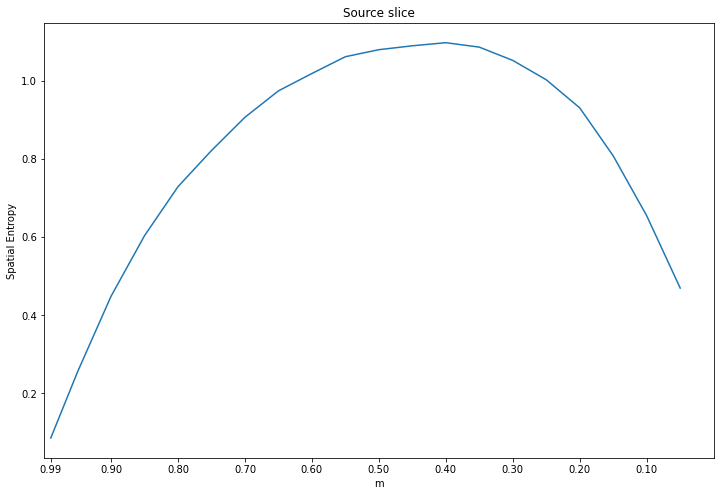

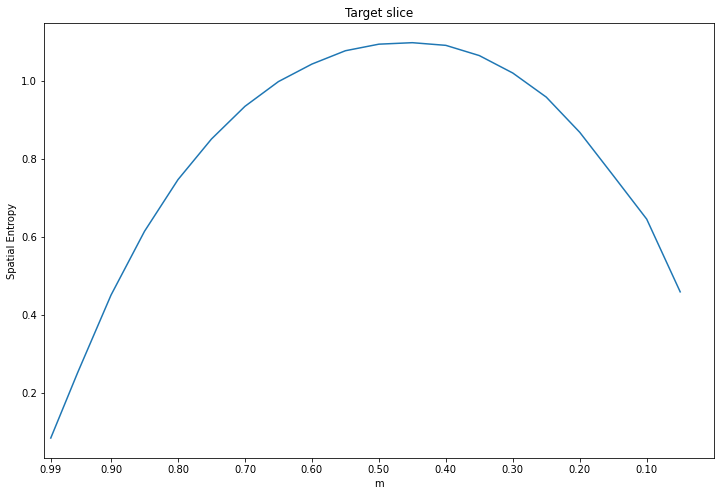

In [8]:
sliceA_convexhullentropies = []
sliceB_convexhullentropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_convexhullentropy, sliceB_convexhullentropy = calculate_convex_hull_spatial_entropy(sliceA, sliceB, pi)
    sliceA_convexhullentropies.append(sliceA_convexhullentropy)
    sliceB_convexhullentropies.append(sliceB_convexhullentropy)
    
plot_entropy_curve(m_to_run, sliceA_convexhullentropies, sliceB_convexhullentropies)

In [ ]:
***
151673_00 - 151674_10
m=0.3
***

In [9]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.3_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.3_dropFalse_rotateFalse_resampleFalse_delta0.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=6.1313E+6
Iteration: 1 | deviance=6.1311E+6
Iteration: 2 | deviance=5.3575E+6
Iteration: 3 | deviance=5.1645E+6
Iteration: 4 | deviance=5.0837E+6
Iteration: 5 | deviance=5.0438E+6
Iteration: 6 | deviance=5.0204E+6
Iteration: 7 | deviance=5.0047E+6
Iteration: 8 | deviance=4.9930E+6
Iteration: 9 | deviance=4.9838E+6
Iteration: 10 | deviance=4.9764E+6
Iteration: 11 | deviance=4.9703E+6
Iteration: 12 | deviance=4.9652E+6
Iteration: 13 | deviance=4.9609E+6
Iteration: 14 | deviance=4.9572E+6
Iteration: 15 | deviance=4.9540E+6
Iteration: 16 | deviance=4.9513E+6
Iteration: 17 | deviance=4.9489E+6
Iteration: 18 | deviance=4.9467E+6
Iteration: 19 | deviance=4.9449E+6
Iteration: 20 | deviance=4.9432E+6
Iteration: 21 | deviance=4.9416E+6
Iteration: 22 | deviance=4.9403E+6
Iteration: 23 | deviance=4.9390E+6
Iteration: 24 | deviance=4.9378E+6
Iteration: 25 | deviance=4.9368E+6
Iteration: 26 | deviance=4.9358E+6
Iteration: 27 | deviance=4.9349E+6
Iteration:

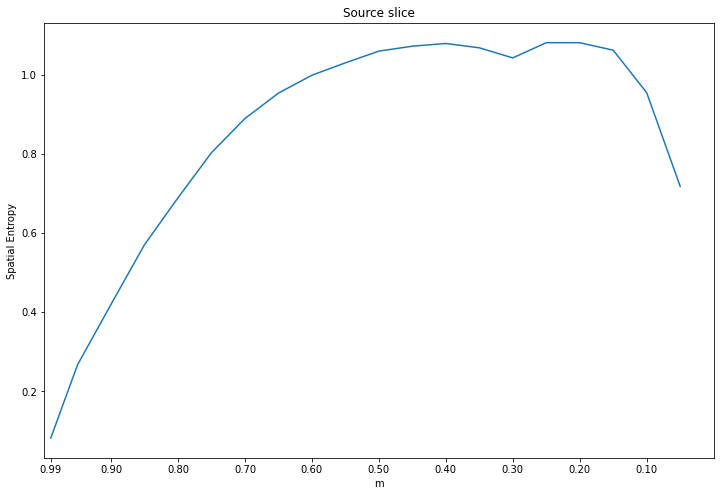

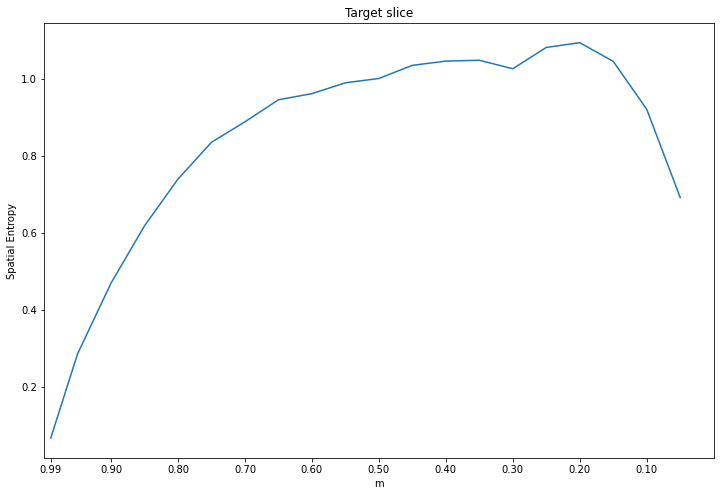

In [10]:
sliceA_convexhullentropies = []
sliceB_convexhullentropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_convexhullentropy, sliceB_convexhullentropy = calculate_convex_hull_spatial_entropy(sliceA, sliceB, pi)
    sliceA_convexhullentropies.append(sliceA_convexhullentropy)
    sliceB_convexhullentropies.append(sliceB_convexhullentropy)
    
plot_entropy_curve(m_to_run, sliceA_convexhullentropies, sliceB_convexhullentropies)

In [ ]:
***
151673_00 - 151674_01
m=0.3
***

In [11]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.3_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.3_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col1.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=5.9347E+6
Iteration: 1 | deviance=5.9345E+6
Iteration: 2 | deviance=5.5676E+6
Iteration: 3 | deviance=5.3825E+6
Iteration: 4 | deviance=5.2919E+6
Iteration: 5 | deviance=5.2484E+6
Iteration: 6 | deviance=5.2252E+6
Iteration: 7 | deviance=5.2101E+6
Iteration: 8 | deviance=5.1991E+6
Iteration: 9 | deviance=5.1907E+6
Iteration: 10 | deviance=5.1841E+6
Iteration: 11 | deviance=5.1788E+6
Iteration: 12 | deviance=5.1745E+6
Iteration: 13 | deviance=5.1709E+6
Iteration: 14 | deviance=5.1680E+6
Iteration: 15 | deviance=5.1656E+6
Iteration: 16 | deviance=5.1635E+6
Iteration: 17 | deviance=5.1617E+6
Iteration: 18 | deviance=5.1601E+6
Iteration: 19 | deviance=5.1588E+6
Iteration: 20 | deviance=5.1576E+6
Iteration: 21 | deviance=5.1565E+6
Iteration: 22 | deviance=5.1556E+6
Iteration: 23 | deviance=5.1547E+6
Iteration: 24 | deviance=5.1540E+6
Iteration: 25 | deviance=5.1533E+6
Iteration: 26 | deviance=5.1527E+6
Iteration: 27 | deviance=5.1521E+6
Iteration:

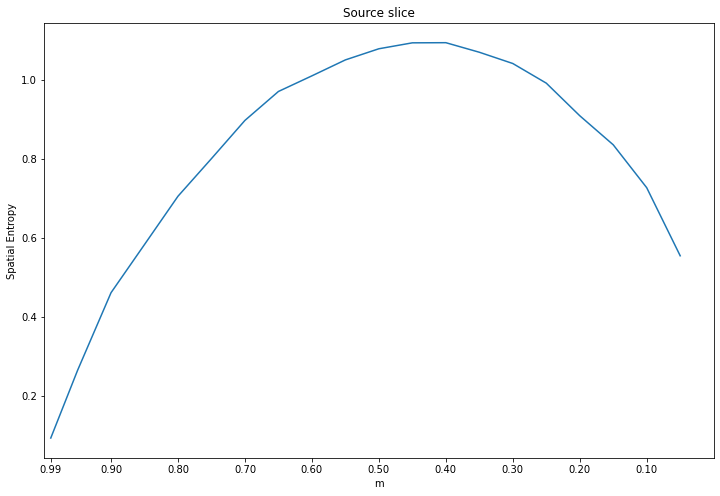

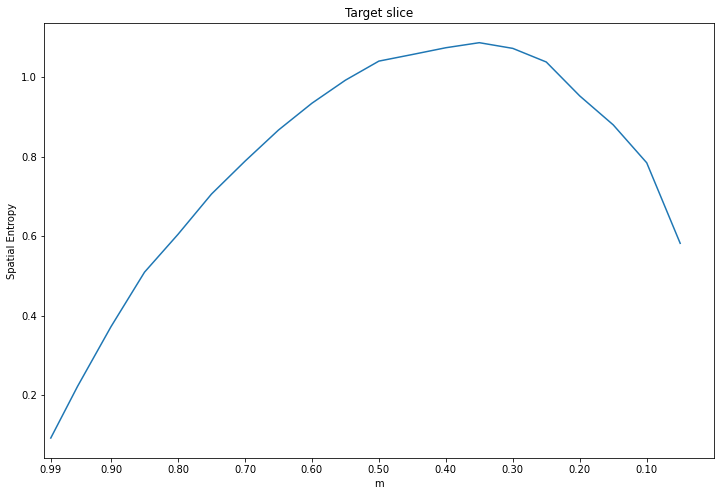

In [12]:
sliceA_convexhullentropies = []
sliceB_convexhullentropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_convexhullentropy, sliceB_convexhullentropy = calculate_convex_hull_spatial_entropy(sliceA, sliceB, pi)
    sliceA_convexhullentropies.append(sliceA_convexhullentropy)
    sliceB_convexhullentropies.append(sliceB_convexhullentropy)
    
plot_entropy_curve(m_to_run, sliceA_convexhullentropies, sliceB_convexhullentropies)

In [ ]:
***
151673_00 - 151674_01
m=0.5
***

In [13]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col1.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=7.9526E+6
Iteration: 1 | deviance=7.9521E+6
Iteration: 2 | deviance=7.3874E+6
Iteration: 3 | deviance=7.1571E+6
Iteration: 4 | deviance=7.0500E+6
Iteration: 5 | deviance=6.9979E+6
Iteration: 6 | deviance=6.9683E+6
Iteration: 7 | deviance=6.9496E+6
Iteration: 8 | deviance=6.9365E+6
Iteration: 9 | deviance=6.9268E+6
Iteration: 10 | deviance=6.9192E+6
Iteration: 11 | deviance=6.9130E+6
Iteration: 12 | deviance=6.9079E+6
Iteration: 13 | deviance=6.9037E+6
Iteration: 14 | deviance=6.9001E+6
Iteration: 15 | deviance=6.8970E+6
Iteration: 16 | deviance=6.8944E+6
Iteration: 17 | deviance=6.8921E+6
Iteration: 18 | deviance=6.8901E+6
Iteration: 19 | deviance=6.8883E+6
Iteration: 20 | deviance=6.8867E+6
Iteration: 21 | deviance=6.8853E+6
Iteration: 22 | deviance=6.8840E+6
Iteration: 23 | deviance=6.8828E+6
Iteration: 24 | deviance=6.8818E+6
Iteration: 25 | deviance=6.8808E+6
Iteration: 26 | deviance=6.8799E+6
Iteration: 27 | deviance=6.8790E+6
Iteration:

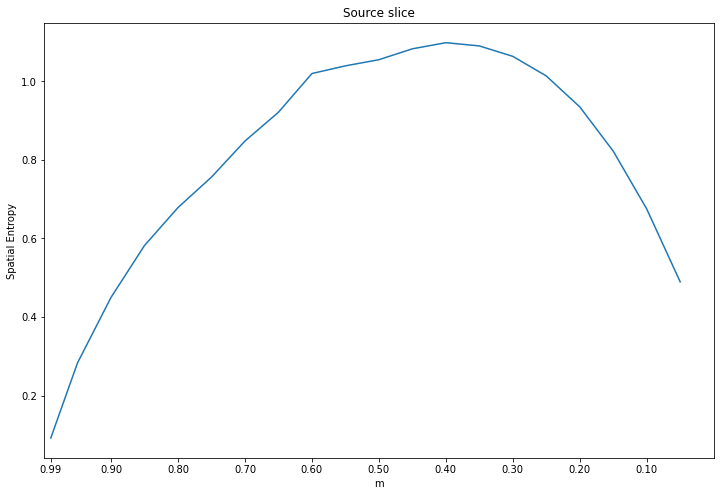

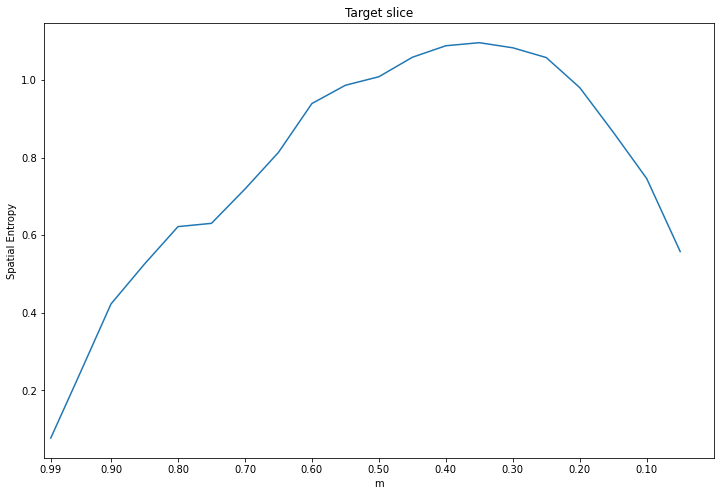

In [14]:
sliceA_convexhullentropies = []
sliceB_convexhullentropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_convexhullentropy, sliceB_convexhullentropy = calculate_convex_hull_spatial_entropy(sliceA, sliceB, pi)
    sliceA_convexhullentropies.append(sliceA_convexhullentropy)
    sliceB_convexhullentropies.append(sliceB_convexhullentropy)
    
plot_entropy_curve(m_to_run, sliceA_convexhullentropies, sliceB_convexhullentropies)

In [ ]:
***
151673_00 - 151674_01
m=0.7
***

In [15]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.7_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.7_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col1.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.1158E+7
Iteration: 1 | deviance=1.1157E+7
Iteration: 2 | deviance=1.0103E+7
Iteration: 3 | deviance=9.8105E+6
Iteration: 4 | deviance=9.6889E+6
Iteration: 5 | deviance=9.6238E+6
Iteration: 6 | deviance=9.5876E+6
Iteration: 7 | deviance=9.5653E+6
Iteration: 8 | deviance=9.5499E+6
Iteration: 9 | deviance=9.5385E+6
Iteration: 10 | deviance=9.5297E+6
Iteration: 11 | deviance=9.5225E+6
Iteration: 12 | deviance=9.5167E+6
Iteration: 13 | deviance=9.5118E+6
Iteration: 14 | deviance=9.5076E+6
Iteration: 15 | deviance=9.5041E+6
Iteration: 16 | deviance=9.5010E+6
Iteration: 17 | deviance=9.4984E+6
Iteration: 18 | deviance=9.4960E+6
Iteration: 19 | deviance=9.4940E+6
Iteration: 20 | deviance=9.4921E+6
Iteration: 21 | deviance=9.4905E+6
Iteration: 22 | deviance=9.4890E+6
Iteration: 23 | deviance=9.4877E+6
Iteration: 24 | deviance=9.4864E+6
Iteration: 25 | deviance=9.4853E+6
Iteration: 26 | deviance=9.4843E+6
GLM-PCA finished with joint matrix shape (477

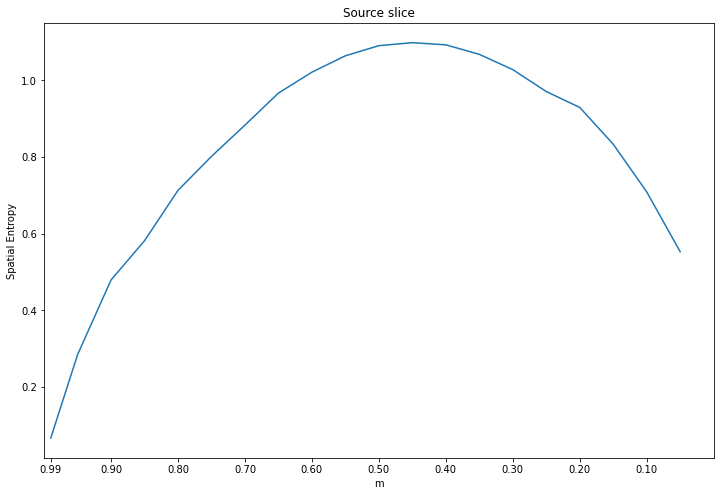

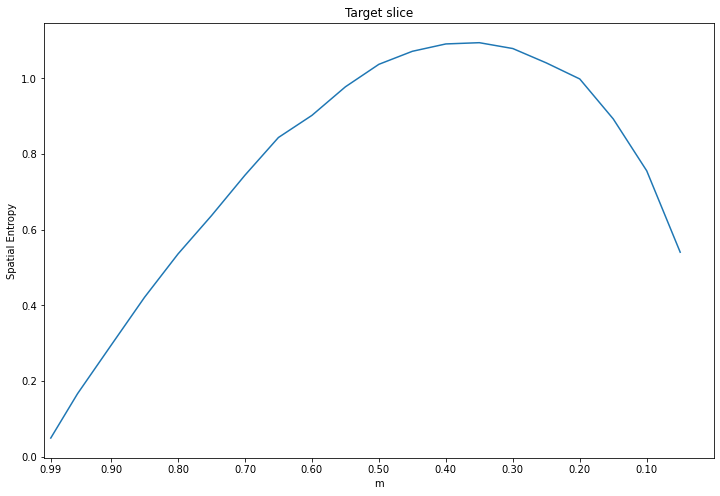

In [16]:
sliceA_convexhullentropies = []
sliceB_convexhullentropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_convexhullentropy, sliceB_convexhullentropy = calculate_convex_hull_spatial_entropy(sliceA, sliceB, pi)
    sliceA_convexhullentropies.append(sliceA_convexhullentropy)
    sliceB_convexhullentropies.append(sliceB_convexhullentropy)
    
plot_entropy_curve(m_to_run, sliceA_convexhullentropies, sliceB_convexhullentropies)

In [ ]:
***
151673_00 - 151674_01
m=0.9
***

In [17]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.9_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.9_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col1.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.6159E+7
Iteration: 1 | deviance=1.6157E+7
Iteration: 2 | deviance=1.4195E+7
Iteration: 3 | deviance=1.3826E+7
Iteration: 4 | deviance=1.3671E+7
Iteration: 5 | deviance=1.3596E+7
Iteration: 6 | deviance=1.3555E+7
Iteration: 7 | deviance=1.3528E+7
Iteration: 8 | deviance=1.3509E+7
Iteration: 9 | deviance=1.3495E+7
Iteration: 10 | deviance=1.3484E+7
Iteration: 11 | deviance=1.3476E+7
Iteration: 12 | deviance=1.3468E+7
Iteration: 13 | deviance=1.3462E+7
Iteration: 14 | deviance=1.3457E+7
Iteration: 15 | deviance=1.3453E+7
Iteration: 16 | deviance=1.3449E+7
Iteration: 17 | deviance=1.3445E+7
Iteration: 18 | deviance=1.3442E+7
Iteration: 19 | deviance=1.3439E+7
Iteration: 20 | deviance=1.3437E+7
Iteration: 21 | deviance=1.3434E+7
Iteration: 22 | deviance=1.3432E+7
Iteration: 23 | deviance=1.3430E+7
Iteration: 24 | deviance=1.3429E+7
Iteration: 25 | deviance=1.3427E+7
Iteration: 26 | deviance=1.3426E+7
GLM-PCA finished with joint matrix shape (666

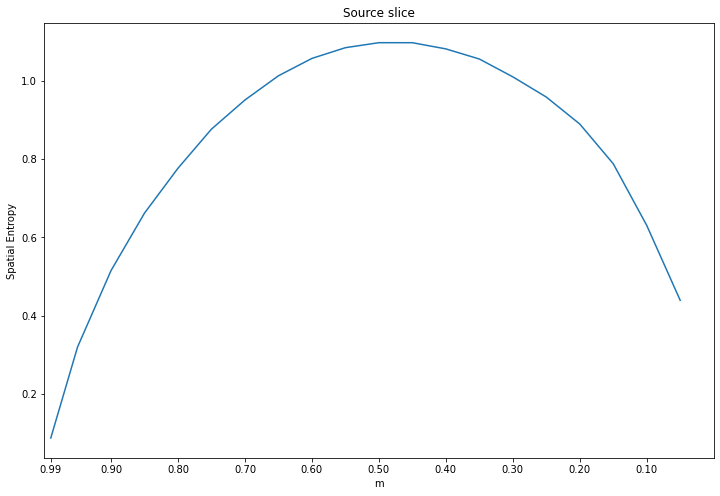

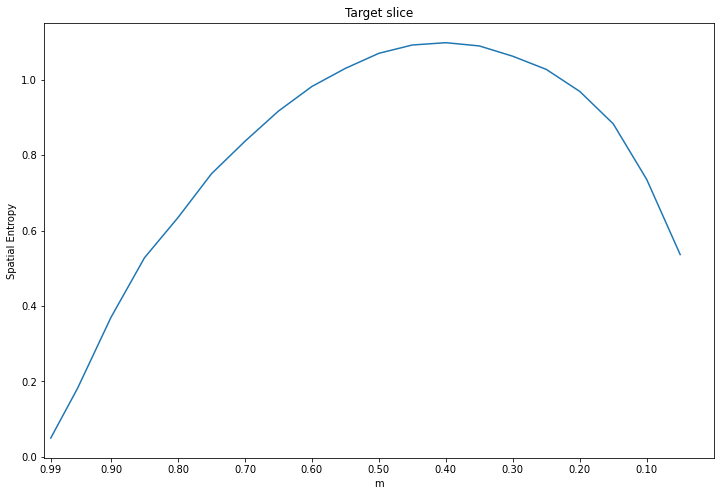

In [18]:
sliceA_convexhullentropies = []
sliceB_convexhullentropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_convexhullentropy, sliceB_convexhullentropy = calculate_convex_hull_spatial_entropy(sliceA, sliceB, pi)
    sliceA_convexhullentropies.append(sliceA_convexhullentropy)
    sliceB_convexhullentropies.append(sliceB_convexhullentropy)
    
plot_entropy_curve(m_to_run, sliceA_convexhullentropies, sliceB_convexhullentropies)

In [ ]:
***
sim00-10
m=0.3
delta=0.1
***

In [19]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.3_dropFalse_rotateFalse_resampleTrue_delta0.1_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.3_dropFalse_rotateFalse_resampleTrue_delta0.1_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=7.3866E+6
Iteration: 1 | deviance=7.3865E+6
Iteration: 2 | deviance=6.6744E+6
Iteration: 3 | deviance=6.4107E+6
Iteration: 4 | deviance=6.2955E+6
Iteration: 5 | deviance=6.2383E+6
Iteration: 6 | deviance=6.2030E+6
Iteration: 7 | deviance=6.1794E+6
Iteration: 8 | deviance=6.1625E+6
Iteration: 9 | deviance=6.1497E+6
Iteration: 10 | deviance=6.1398E+6
Iteration: 11 | deviance=6.1319E+6
Iteration: 12 | deviance=6.1254E+6
Iteration: 13 | deviance=6.1201E+6
Iteration: 14 | deviance=6.1155E+6
Iteration: 15 | deviance=6.1117E+6
Iteration: 16 | deviance=6.1084E+6
Iteration: 17 | deviance=6.1055E+6
Iteration: 18 | deviance=6.1030E+6
Iteration: 19 | deviance=6.1007E+6
Iteration: 20 | deviance=6.0987E+6
Iteration: 21 | deviance=6.0969E+6
Iteration: 22 | deviance=6.0953E+6
Iteration: 23 | deviance=6.0938E+6
Iteration: 24 | deviance=6.0925E+6
Iteration: 25 | deviance=6.0912E+6
Iteration: 26 | deviance=6.0901E+6
Iteration: 27 | deviance=6.0890E+6
Iteration:

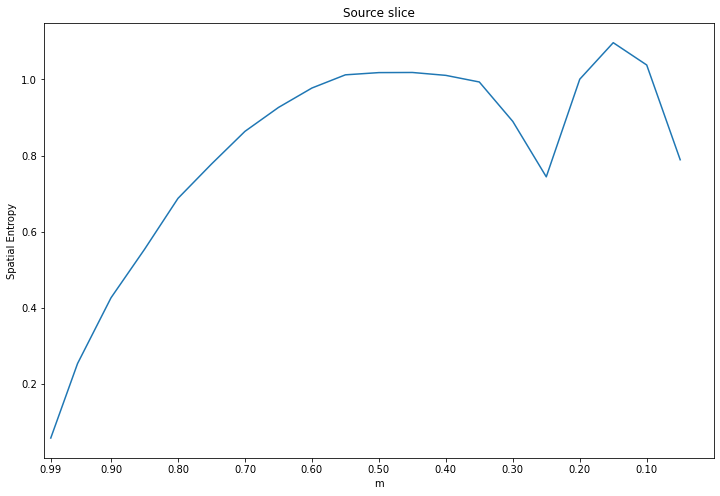

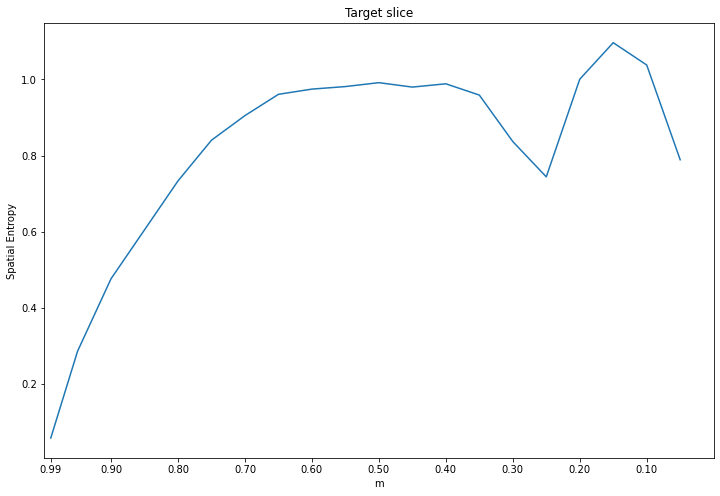

In [20]:
sliceA_convexhullentropies = []
sliceB_convexhullentropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_convexhullentropy, sliceB_convexhullentropy = calculate_convex_hull_spatial_entropy(sliceA, sliceB, pi)
    sliceA_convexhullentropies.append(sliceA_convexhullentropy)
    sliceB_convexhullentropies.append(sliceB_convexhullentropy)
    
plot_entropy_curve(m_to_run, sliceA_convexhullentropies, sliceB_convexhullentropies)

In [ ]:
***
sim00-10
m=0.5
delta=0.1
***

In [21]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.5_dropFalse_rotateFalse_resampleTrue_delta0.1_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.5_dropFalse_rotateFalse_resampleTrue_delta0.1_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=9.6993E+6
Iteration: 1 | deviance=9.6990E+6
Iteration: 2 | deviance=8.7767E+6
Iteration: 3 | deviance=8.4545E+6
Iteration: 4 | deviance=8.3253E+6
Iteration: 5 | deviance=8.2642E+6
Iteration: 6 | deviance=8.2295E+6
Iteration: 7 | deviance=8.2066E+6
Iteration: 8 | deviance=8.1899E+6
Iteration: 9 | deviance=8.1770E+6
Iteration: 10 | deviance=8.1668E+6
Iteration: 11 | deviance=8.1586E+6
Iteration: 12 | deviance=8.1519E+6
Iteration: 13 | deviance=8.1463E+6
Iteration: 14 | deviance=8.1417E+6
Iteration: 15 | deviance=8.1378E+6
Iteration: 16 | deviance=8.1344E+6
Iteration: 17 | deviance=8.1315E+6
Iteration: 18 | deviance=8.1290E+6
Iteration: 19 | deviance=8.1268E+6
Iteration: 20 | deviance=8.1248E+6
Iteration: 21 | deviance=8.1231E+6
Iteration: 22 | deviance=8.1215E+6
Iteration: 23 | deviance=8.1201E+6
Iteration: 24 | deviance=8.1188E+6
Iteration: 25 | deviance=8.1176E+6
Iteration: 26 | deviance=8.1166E+6
Iteration: 27 | deviance=8.1156E+6
Iteration:

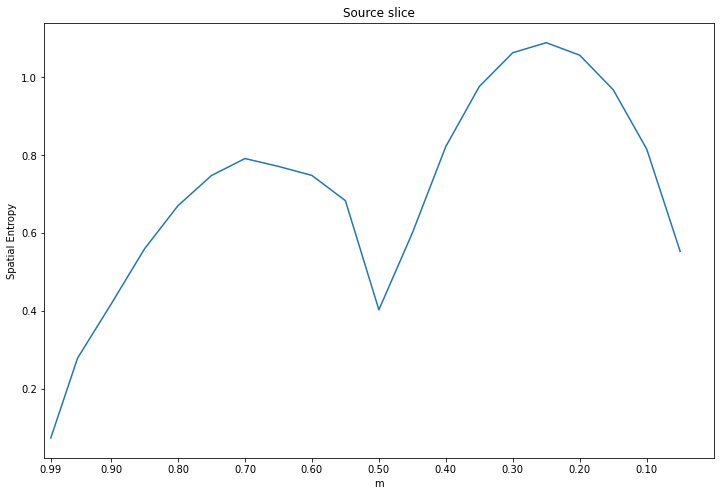

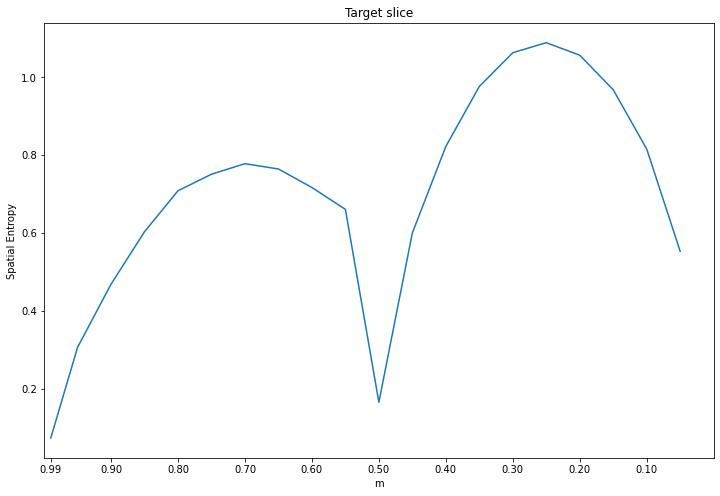

In [22]:
sliceA_convexhullentropies = []
sliceB_convexhullentropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_convexhullentropy, sliceB_convexhullentropy = calculate_convex_hull_spatial_entropy(sliceA, sliceB, pi)
    sliceA_convexhullentropies.append(sliceA_convexhullentropy)
    sliceB_convexhullentropies.append(sliceB_convexhullentropy)
    
plot_entropy_curve(m_to_run, sliceA_convexhullentropies, sliceB_convexhullentropies)

In [ ]:
***
sim00-10
m=0.7
delta=0.1
***

In [37]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.7_dropFalse_rotateFalse_resampleTrue_delta0.1_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.7_dropFalse_rotateFalse_resampleTrue_delta0.1_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.3396E+7
Iteration: 1 | deviance=1.3395E+7
Iteration: 2 | deviance=1.2120E+7
Iteration: 3 | deviance=1.1724E+7
Iteration: 4 | deviance=1.1550E+7
Iteration: 5 | deviance=1.1469E+7
Iteration: 6 | deviance=1.1422E+7
Iteration: 7 | deviance=1.1391E+7
Iteration: 8 | deviance=1.1369E+7
Iteration: 9 | deviance=1.1352E+7
Iteration: 10 | deviance=1.1340E+7
Iteration: 11 | deviance=1.1329E+7
Iteration: 12 | deviance=1.1321E+7
Iteration: 13 | deviance=1.1314E+7
Iteration: 14 | deviance=1.1308E+7
Iteration: 15 | deviance=1.1303E+7
Iteration: 16 | deviance=1.1298E+7
Iteration: 17 | deviance=1.1294E+7
Iteration: 18 | deviance=1.1291E+7
Iteration: 19 | deviance=1.1288E+7
Iteration: 20 | deviance=1.1285E+7
Iteration: 21 | deviance=1.1283E+7
Iteration: 22 | deviance=1.1280E+7
Iteration: 23 | deviance=1.1278E+7
Iteration: 24 | deviance=1.1277E+7
Iteration: 25 | deviance=1.1275E+7
Iteration: 26 | deviance=1.1274E+7
Iteration: 27 | deviance=1.1272E+7
Iteration:

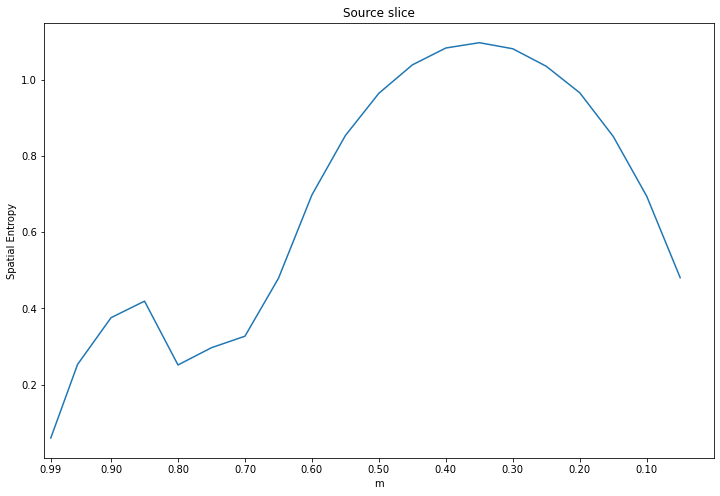

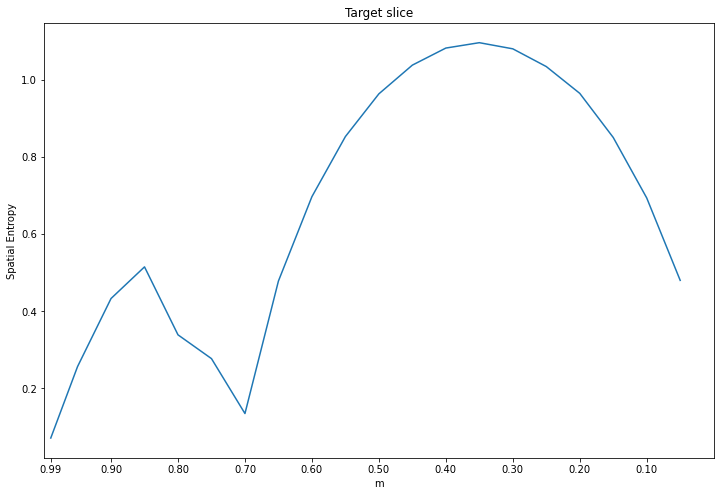

In [38]:
sliceA_convexhullentropies = []
sliceB_convexhullentropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_convexhullentropy, sliceB_convexhullentropy = calculate_convex_hull_spatial_entropy(sliceA, sliceB, pi)
    sliceA_convexhullentropies.append(sliceA_convexhullentropy)
    sliceB_convexhullentropies.append(sliceB_convexhullentropy)
    
plot_entropy_curve(m_to_run, sliceA_convexhullentropies, sliceB_convexhullentropies)

In [ ]:
***
sim00-10
m=0.9
delta=0.1
***

In [23]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.9_dropFalse_rotateFalse_resampleTrue_delta0.1_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.9_dropFalse_rotateFalse_resampleTrue_delta0.1_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.9186E+7
Iteration: 1 | deviance=1.9184E+7
Iteration: 2 | deviance=1.7241E+7
Iteration: 3 | deviance=1.6731E+7
Iteration: 4 | deviance=1.6517E+7
Iteration: 5 | deviance=1.6415E+7
Iteration: 6 | deviance=1.6357E+7
Iteration: 7 | deviance=1.6318E+7
Iteration: 8 | deviance=1.6290E+7
Iteration: 9 | deviance=1.6269E+7
Iteration: 10 | deviance=1.6253E+7
Iteration: 11 | deviance=1.6240E+7
Iteration: 12 | deviance=1.6230E+7
Iteration: 13 | deviance=1.6221E+7
Iteration: 14 | deviance=1.6213E+7
Iteration: 15 | deviance=1.6207E+7
Iteration: 16 | deviance=1.6201E+7
Iteration: 17 | deviance=1.6196E+7
Iteration: 18 | deviance=1.6192E+7
Iteration: 19 | deviance=1.6188E+7
Iteration: 20 | deviance=1.6184E+7
Iteration: 21 | deviance=1.6181E+7
Iteration: 22 | deviance=1.6178E+7
Iteration: 23 | deviance=1.6176E+7
Iteration: 24 | deviance=1.6174E+7
Iteration: 25 | deviance=1.6171E+7
Iteration: 26 | deviance=1.6170E+7
Iteration: 27 | deviance=1.6168E+7
GLM-PCA fi

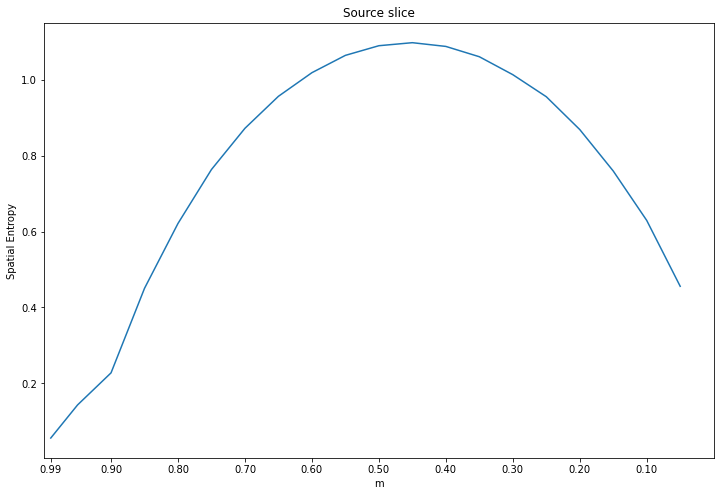

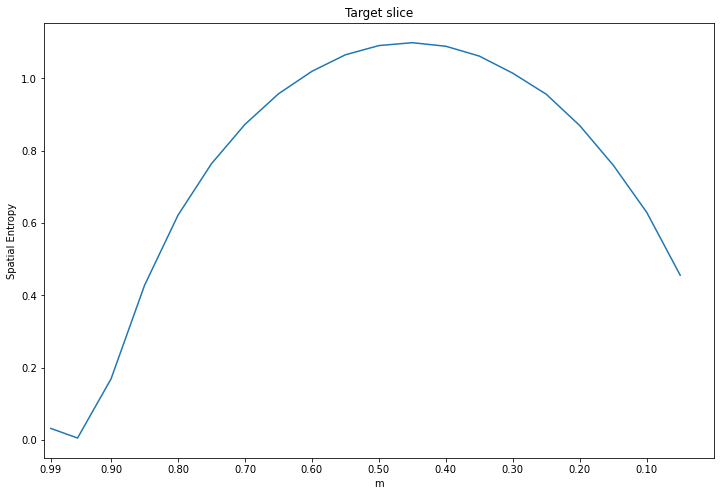

In [24]:
sliceA_convexhullentropies = []
sliceB_convexhullentropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_convexhullentropy, sliceB_convexhullentropy = calculate_convex_hull_spatial_entropy(sliceA, sliceB, pi)
    sliceA_convexhullentropies.append(sliceA_convexhullentropy)
    sliceB_convexhullentropies.append(sliceB_convexhullentropy)
    
plot_entropy_curve(m_to_run, sliceA_convexhullentropies, sliceB_convexhullentropies)

In [ ]:
***
sim00-10
m=0.3
delta=1.0
***

In [25]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.3_dropFalse_rotateFalse_resampleTrue_delta1.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.3_dropFalse_rotateFalse_resampleTrue_delta1.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=6.1433E+6
Iteration: 1 | deviance=6.1432E+6
Iteration: 2 | deviance=5.6385E+6
Iteration: 3 | deviance=5.4475E+6
Iteration: 4 | deviance=5.3450E+6
Iteration: 5 | deviance=5.2926E+6
Iteration: 6 | deviance=5.2643E+6
Iteration: 7 | deviance=5.2464E+6
Iteration: 8 | deviance=5.2340E+6
Iteration: 9 | deviance=5.2248E+6
Iteration: 10 | deviance=5.2177E+6
Iteration: 11 | deviance=5.2119E+6
Iteration: 12 | deviance=5.2072E+6
Iteration: 13 | deviance=5.2032E+6
Iteration: 14 | deviance=5.1999E+6
Iteration: 15 | deviance=5.1971E+6
Iteration: 16 | deviance=5.1946E+6
Iteration: 17 | deviance=5.1925E+6
Iteration: 18 | deviance=5.1907E+6
Iteration: 19 | deviance=5.1891E+6
Iteration: 20 | deviance=5.1876E+6
Iteration: 21 | deviance=5.1863E+6
Iteration: 22 | deviance=5.1852E+6
Iteration: 23 | deviance=5.1842E+6
Iteration: 24 | deviance=5.1833E+6
Iteration: 25 | deviance=5.1824E+6
Iteration: 26 | deviance=5.1817E+6
Iteration: 27 | deviance=5.1810E+6
Iteration:

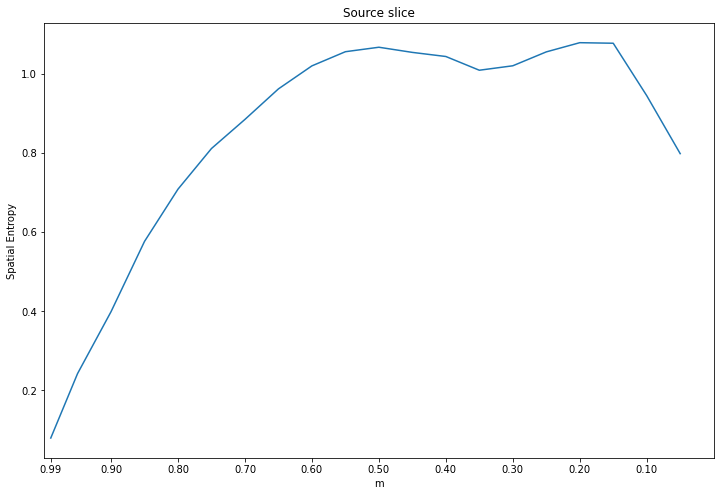

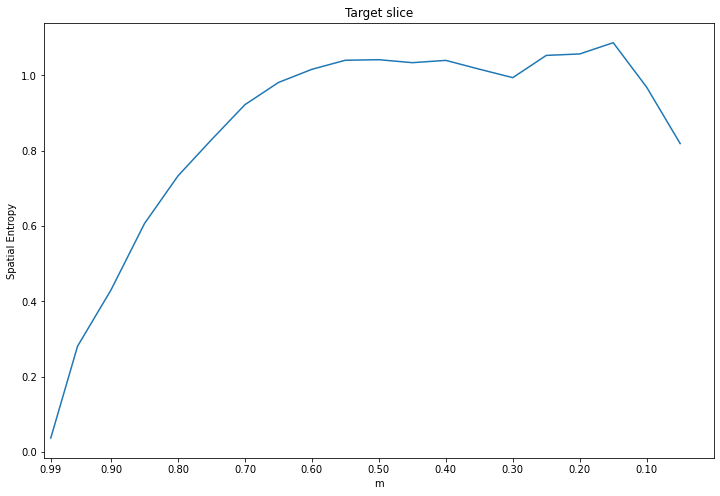

In [26]:
sliceA_convexhullentropies = []
sliceB_convexhullentropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_convexhullentropy, sliceB_convexhullentropy = calculate_convex_hull_spatial_entropy(sliceA, sliceB, pi)
    sliceA_convexhullentropies.append(sliceA_convexhullentropy)
    sliceB_convexhullentropies.append(sliceB_convexhullentropy)
    
plot_entropy_curve(m_to_run, sliceA_convexhullentropies, sliceB_convexhullentropies)

In [ ]:
***
sim00-10
m=0.5
delta=1.0
***

In [27]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.5_dropFalse_rotateFalse_resampleTrue_delta1.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.5_dropFalse_rotateFalse_resampleTrue_delta1.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=8.1306E+6
Iteration: 1 | deviance=8.1304E+6
Iteration: 2 | deviance=7.4165E+6
Iteration: 3 | deviance=7.1749E+6
Iteration: 4 | deviance=7.0626E+6
Iteration: 5 | deviance=7.0099E+6
Iteration: 6 | deviance=6.9802E+6
Iteration: 7 | deviance=6.9610E+6
Iteration: 8 | deviance=6.9475E+6
Iteration: 9 | deviance=6.9374E+6
Iteration: 10 | deviance=6.9296E+6
Iteration: 11 | deviance=6.9233E+6
Iteration: 12 | deviance=6.9182E+6
Iteration: 13 | deviance=6.9140E+6
Iteration: 14 | deviance=6.9104E+6
Iteration: 15 | deviance=6.9073E+6
Iteration: 16 | deviance=6.9047E+6
Iteration: 17 | deviance=6.9024E+6
Iteration: 18 | deviance=6.9004E+6
Iteration: 19 | deviance=6.8986E+6
Iteration: 20 | deviance=6.8971E+6
Iteration: 21 | deviance=6.8957E+6
Iteration: 22 | deviance=6.8945E+6
Iteration: 23 | deviance=6.8934E+6
Iteration: 24 | deviance=6.8924E+6
Iteration: 25 | deviance=6.8915E+6
Iteration: 26 | deviance=6.8907E+6
Iteration: 27 | deviance=6.8900E+6
GLM-PCA fi

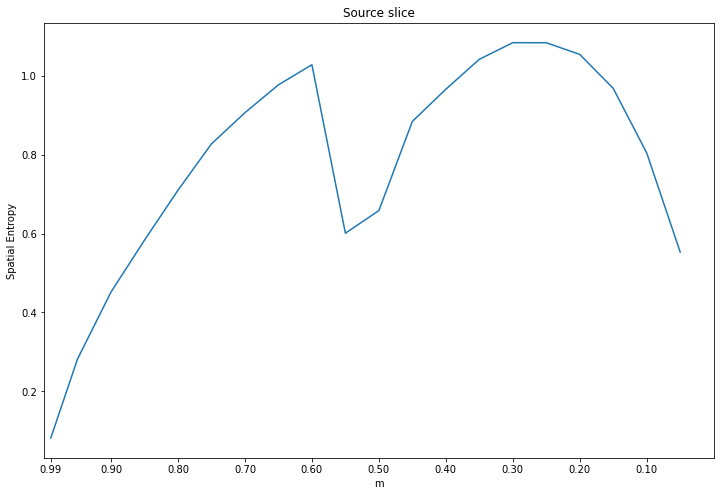

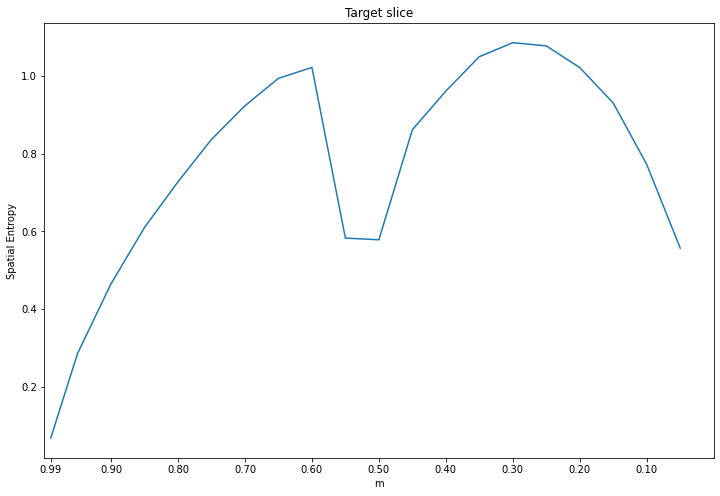

In [28]:
sliceA_convexhullentropies = []
sliceB_convexhullentropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_convexhullentropy, sliceB_convexhullentropy = calculate_convex_hull_spatial_entropy(sliceA, sliceB, pi)
    sliceA_convexhullentropies.append(sliceA_convexhullentropy)
    sliceB_convexhullentropies.append(sliceB_convexhullentropy)
    
plot_entropy_curve(m_to_run, sliceA_convexhullentropies, sliceB_convexhullentropies)

In [ ]:
***
sim00-10
m=0.9
delta=1.0
***

In [29]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.9_dropFalse_rotateFalse_resampleTrue_delta1.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.9_dropFalse_rotateFalse_resampleTrue_delta1.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.6316E+7
Iteration: 1 | deviance=1.6313E+7
Iteration: 2 | deviance=1.4535E+7
Iteration: 3 | deviance=1.4143E+7
Iteration: 4 | deviance=1.3957E+7
Iteration: 5 | deviance=1.3864E+7
Iteration: 6 | deviance=1.3815E+7
Iteration: 7 | deviance=1.3785E+7
Iteration: 8 | deviance=1.3765E+7
Iteration: 9 | deviance=1.3750E+7
Iteration: 10 | deviance=1.3738E+7
Iteration: 11 | deviance=1.3729E+7
Iteration: 12 | deviance=1.3722E+7
Iteration: 13 | deviance=1.3715E+7
Iteration: 14 | deviance=1.3710E+7
Iteration: 15 | deviance=1.3705E+7
Iteration: 16 | deviance=1.3701E+7
Iteration: 17 | deviance=1.3698E+7
Iteration: 18 | deviance=1.3694E+7
Iteration: 19 | deviance=1.3692E+7
Iteration: 20 | deviance=1.3689E+7
Iteration: 21 | deviance=1.3687E+7
Iteration: 22 | deviance=1.3685E+7
Iteration: 23 | deviance=1.3683E+7
Iteration: 24 | deviance=1.3681E+7
Iteration: 25 | deviance=1.3680E+7
Iteration: 26 | deviance=1.3678E+7
GLM-PCA finished with joint matrix shape (657

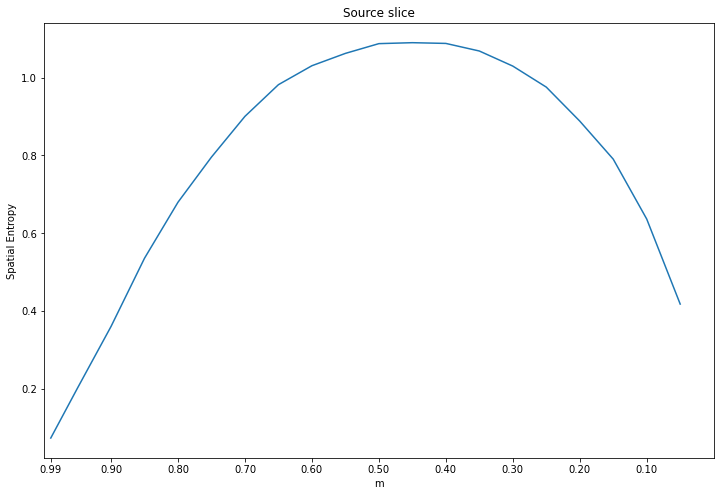

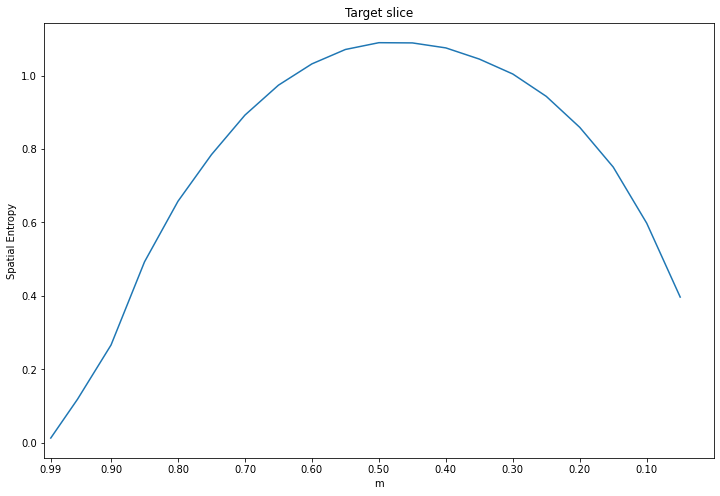

In [30]:
sliceA_convexhullentropies = []
sliceB_convexhullentropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_convexhullentropy, sliceB_convexhullentropy = calculate_convex_hull_spatial_entropy(sliceA, sliceB, pi)
    sliceA_convexhullentropies.append(sliceA_convexhullentropy)
    sliceB_convexhullentropies.append(sliceB_convexhullentropy)
    
plot_entropy_curve(m_to_run, sliceA_convexhullentropies, sliceB_convexhullentropies)

In [ ]:
***
sim00-10
m=0.3
delta=3.0
***

In [31]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.3_dropFalse_rotateFalse_resampleTrue_delta3.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.3_dropFalse_rotateFalse_resampleTrue_delta3.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=6.0098E+6
Iteration: 1 | deviance=6.0096E+6
Iteration: 2 | deviance=5.3578E+6
Iteration: 3 | deviance=5.1807E+6
Iteration: 4 | deviance=5.0874E+6
Iteration: 5 | deviance=5.0434E+6
Iteration: 6 | deviance=5.0201E+6
Iteration: 7 | deviance=5.0054E+6
Iteration: 8 | deviance=4.9950E+6
Iteration: 9 | deviance=4.9871E+6
Iteration: 10 | deviance=4.9809E+6
Iteration: 11 | deviance=4.9760E+6
Iteration: 12 | deviance=4.9719E+6
Iteration: 13 | deviance=4.9685E+6
Iteration: 14 | deviance=4.9657E+6
Iteration: 15 | deviance=4.9632E+6
Iteration: 16 | deviance=4.9611E+6
Iteration: 17 | deviance=4.9593E+6
Iteration: 18 | deviance=4.9577E+6
Iteration: 19 | deviance=4.9563E+6
Iteration: 20 | deviance=4.9551E+6
Iteration: 21 | deviance=4.9540E+6
Iteration: 22 | deviance=4.9530E+6
Iteration: 23 | deviance=4.9521E+6
Iteration: 24 | deviance=4.9513E+6
Iteration: 25 | deviance=4.9506E+6
Iteration: 26 | deviance=4.9499E+6
Iteration: 27 | deviance=4.9493E+6
Iteration:

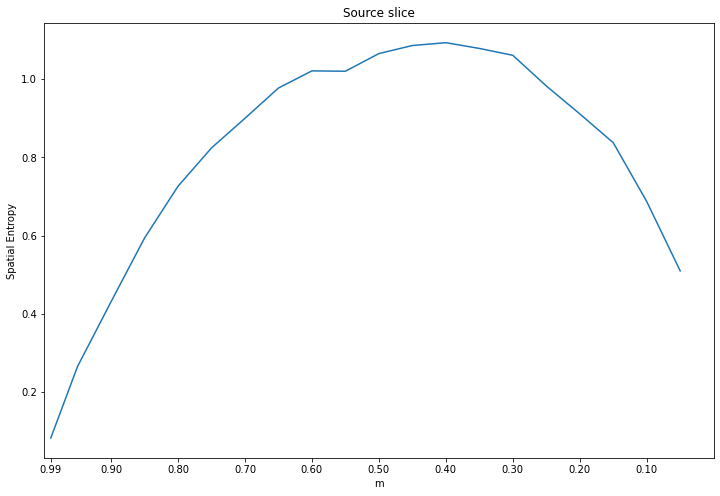

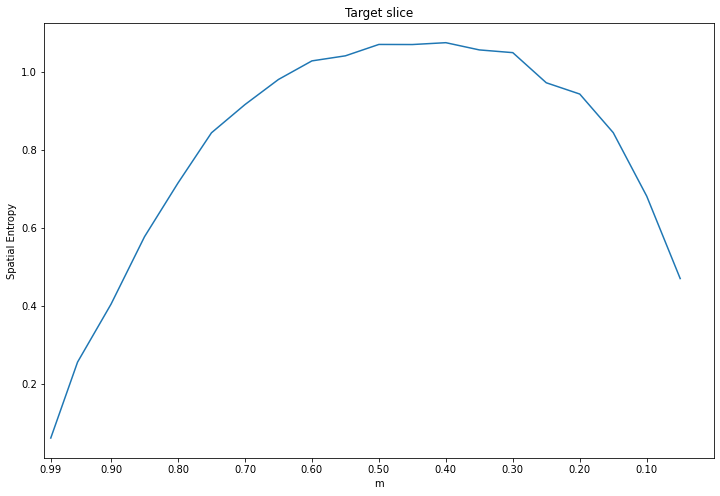

In [32]:
sliceA_convexhullentropies = []
sliceB_convexhullentropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_convexhullentropy, sliceB_convexhullentropy = calculate_convex_hull_spatial_entropy(sliceA, sliceB, pi)
    sliceA_convexhullentropies.append(sliceA_convexhullentropy)
    sliceB_convexhullentropies.append(sliceB_convexhullentropy)
    
plot_entropy_curve(m_to_run, sliceA_convexhullentropies, sliceB_convexhullentropies)

In [ ]:
***
sim00-10
m=0.5
delta=3.0
***

In [33]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.5_dropFalse_rotateFalse_resampleTrue_delta3.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.5_dropFalse_rotateFalse_resampleTrue_delta3.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=7.9995E+6
Iteration: 1 | deviance=7.9991E+6
Iteration: 2 | deviance=7.0770E+6
Iteration: 3 | deviance=6.8970E+6
Iteration: 4 | deviance=6.7793E+6
Iteration: 5 | deviance=6.7131E+6
Iteration: 6 | deviance=6.6772E+6
Iteration: 7 | deviance=6.6559E+6
Iteration: 8 | deviance=6.6417E+6
Iteration: 9 | deviance=6.6315E+6
Iteration: 10 | deviance=6.6238E+6
Iteration: 11 | deviance=6.6177E+6
Iteration: 12 | deviance=6.6128E+6
Iteration: 13 | deviance=6.6088E+6
Iteration: 14 | deviance=6.6054E+6
Iteration: 15 | deviance=6.6025E+6
Iteration: 16 | deviance=6.6000E+6
Iteration: 17 | deviance=6.5978E+6
Iteration: 18 | deviance=6.5959E+6
Iteration: 19 | deviance=6.5943E+6
Iteration: 20 | deviance=6.5928E+6
Iteration: 21 | deviance=6.5915E+6
Iteration: 22 | deviance=6.5903E+6
Iteration: 23 | deviance=6.5892E+6
Iteration: 24 | deviance=6.5883E+6
Iteration: 25 | deviance=6.5874E+6
Iteration: 26 | deviance=6.5866E+6
Iteration: 27 | deviance=6.5859E+6
Iteration:

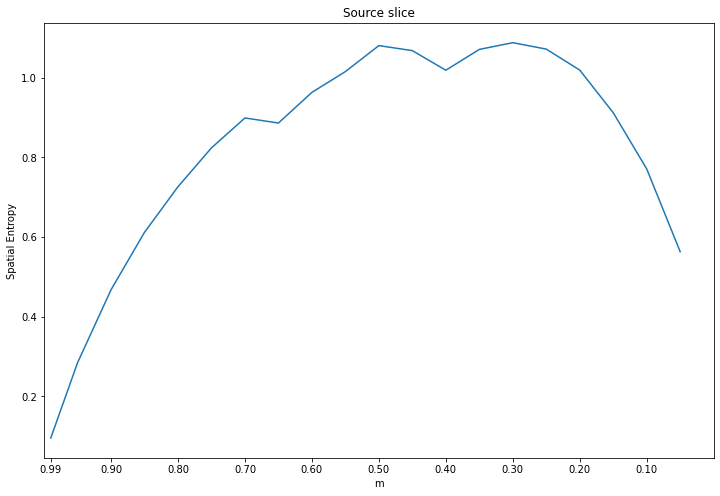

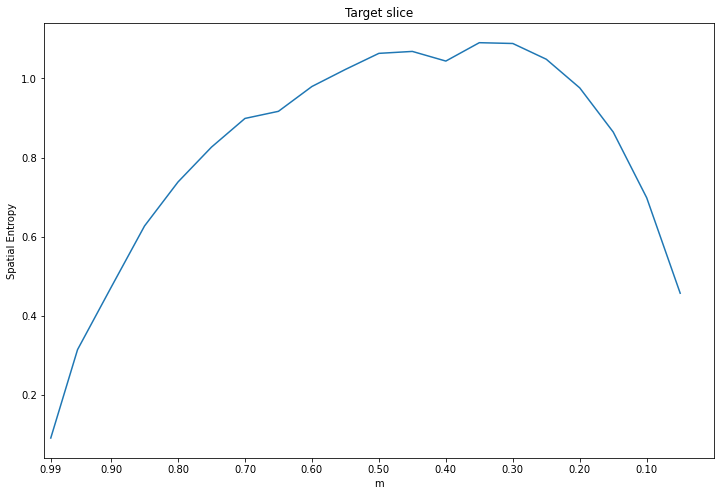

In [34]:
sliceA_convexhullentropies = []
sliceB_convexhullentropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_convexhullentropy, sliceB_convexhullentropy = calculate_convex_hull_spatial_entropy(sliceA, sliceB, pi)
    sliceA_convexhullentropies.append(sliceA_convexhullentropy)
    sliceB_convexhullentropies.append(sliceB_convexhullentropy)
    
plot_entropy_curve(m_to_run, sliceA_convexhullentropies, sliceB_convexhullentropies)

In [ ]:
***
sim00-10
m=0.7
delta=3.0
***

In [35]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.7_dropFalse_rotateFalse_resampleTrue_delta3.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.7_dropFalse_rotateFalse_resampleTrue_delta3.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.1224E+7
Iteration: 1 | deviance=1.1223E+7
Iteration: 2 | deviance=9.7615E+6
Iteration: 3 | deviance=9.5147E+6
Iteration: 4 | deviance=9.3833E+6
Iteration: 5 | deviance=9.3056E+6
Iteration: 6 | deviance=9.2610E+6
Iteration: 7 | deviance=9.2328E+6
Iteration: 8 | deviance=9.2141E+6
Iteration: 9 | deviance=9.2010E+6
Iteration: 10 | deviance=9.1911E+6
Iteration: 11 | deviance=9.1834E+6
Iteration: 12 | deviance=9.1773E+6
Iteration: 13 | deviance=9.1722E+6
Iteration: 14 | deviance=9.1680E+6
Iteration: 15 | deviance=9.1644E+6
Iteration: 16 | deviance=9.1613E+6
Iteration: 17 | deviance=9.1587E+6
Iteration: 18 | deviance=9.1564E+6
Iteration: 19 | deviance=9.1543E+6
Iteration: 20 | deviance=9.1525E+6
Iteration: 21 | deviance=9.1509E+6
Iteration: 22 | deviance=9.1495E+6
Iteration: 23 | deviance=9.1482E+6
Iteration: 24 | deviance=9.1470E+6
Iteration: 25 | deviance=9.1459E+6
Iteration: 26 | deviance=9.1450E+6
GLM-PCA finished with joint matrix shape (467

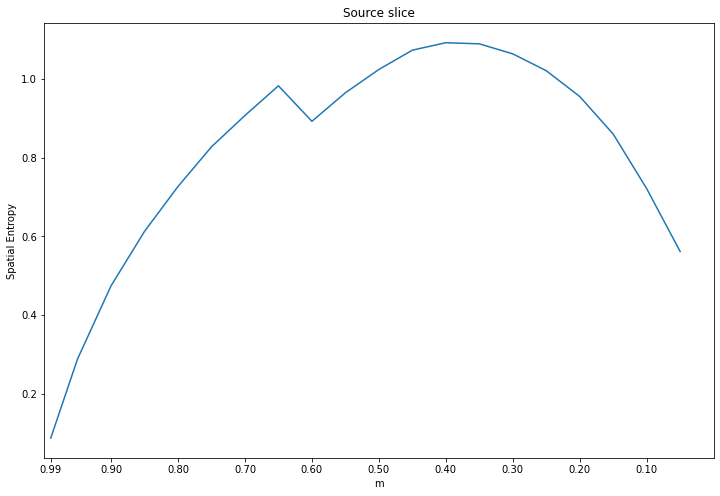

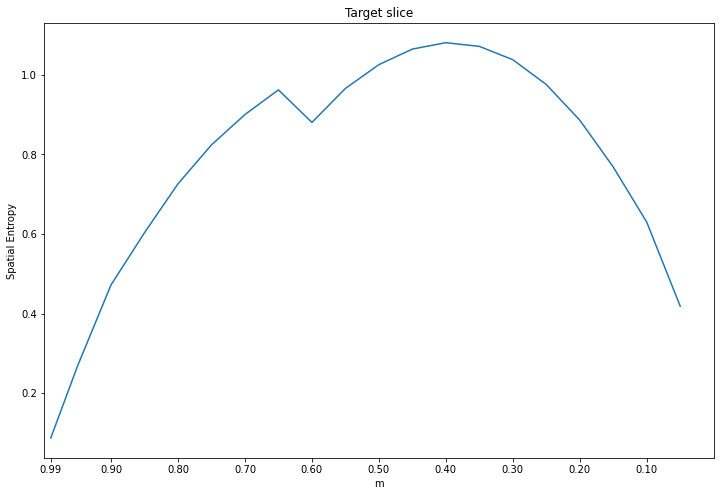

In [36]:
sliceA_convexhullentropies = []
sliceB_convexhullentropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_convexhullentropy, sliceB_convexhullentropy = calculate_convex_hull_spatial_entropy(sliceA, sliceB, pi)
    sliceA_convexhullentropies.append(sliceA_convexhullentropy)
    sliceB_convexhullentropies.append(sliceB_convexhullentropy)
    
plot_entropy_curve(m_to_run, sliceA_convexhullentropies, sliceB_convexhullentropies)